In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
INPUT_FILE_PATH = 'data/weatherAUS.csv'
OUTPUT_FILE_PATH = 'data/weatherAUS_cleaned.csv'

In [13]:
# Read the data
df = pd.read_csv(INPUT_FILE_PATH)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [14]:
# Check only Sydney airport data and replace NaN values
df = df[df.Location == 'SydneyAirport']

# Get list of categorical variables
s = (df.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

# Filling missing values with mode of the column in value
for i in object_cols:
    df.loc[:,i].fillna(df[i].mode()[0], inplace=True)

# Get list of numeric variables
t = (df.dtypes == "float64")
num_cols = list(t[t].index)

print("Numeric variables:")
print(num_cols)

# Filling missing values with median of the column in value
for i in num_cols:
    df[i].fillna(df[i].median(), inplace=True)

df.info()

df

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
<class 'pandas.core.frame.DataFrame'>
Index: 3009 entries, 33520 to 36528
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3009 non-null   object 
 1   Location       3009 non-null   object 
 2   MinTemp        3009 non-null   float64
 3   MaxTemp        3009 non-null   float64
 4   Rainfall       3009 non-null   float64
 5   Evaporation    3009 non-null   float64
 6   Sunshine       3009 non-null   float64
 7   WindGustDir    3009 non-null   object 
 8   WindGustSpeed  3009 non-null   float64
 9   WindDir9am     3009 non-null   object 
 10  WindDir3

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
33520,2009-01-01,SydneyAirport,17.7,35.1,0.0,9.8,12.9,S,72.0,NW,...,63.0,13.0,1005.3,1000.2,6.0,6.0,22.9,34.0,No,No
33521,2009-01-02,SydneyAirport,18.5,23.0,0.0,11.0,5.9,S,63.0,SSE,...,63.0,58.0,1012.9,1014.1,5.0,6.0,20.6,20.1,No,No
33522,2009-01-03,SydneyAirport,16.9,23.2,0.0,9.0,0.5,S,46.0,ESE,...,52.0,50.0,1021.8,1019.4,7.0,8.0,18.9,22.0,No,No
33523,2009-01-04,SydneyAirport,18.7,27.1,0.0,5.4,11.3,NE,65.0,NNE,...,60.0,51.0,1018.5,1014.9,2.0,1.0,22.9,25.9,No,No
33524,2009-01-05,SydneyAirport,20.2,31.6,0.0,10.0,12.2,NNE,63.0,WNW,...,58.0,52.0,1013.2,1008.0,6.0,3.0,24.9,29.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36524,2017-06-21,SydneyAirport,8.6,18.6,0.2,2.0,7.8,SSW,56.0,NNW,...,69.0,67.0,1025.7,1025.3,2.0,2.0,13.3,17.7,No,No
36525,2017-06-22,SydneyAirport,9.5,17.8,0.2,2.0,9.2,SW,35.0,NNW,...,74.0,70.0,1028.3,1024.6,2.0,2.0,14.3,16.8,No,No
36526,2017-06-23,SydneyAirport,8.7,19.4,0.0,2.4,2.7,NNW,30.0,NW,...,83.0,57.0,1020.8,1014.7,6.0,6.0,10.9,18.2,No,No
36527,2017-06-24,SydneyAirport,9.4,19.9,0.0,1.4,9.3,SW,43.0,WNW,...,61.0,41.0,1017.3,1015.2,5.0,2.0,12.9,19.3,No,No


In [15]:
# Filter out the columns that are not needed
col_list = ["Date", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]
df = df[col_list]
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
33520,2009-01-01,17.7,35.1,0.0,9.8,12.9,15.0,33.0,63.0,13.0,1005.3,1000.2,22.9,34.0
33521,2009-01-02,18.5,23.0,0.0,11.0,5.9,15.0,35.0,63.0,58.0,1012.9,1014.1,20.6,20.1
33522,2009-01-03,16.9,23.2,0.0,9.0,0.5,15.0,17.0,52.0,50.0,1021.8,1019.4,18.9,22.0
33523,2009-01-04,18.7,27.1,0.0,5.4,11.3,24.0,48.0,60.0,51.0,1018.5,1014.9,22.9,25.9
33524,2009-01-05,20.2,31.6,0.0,10.0,12.2,11.0,35.0,58.0,52.0,1013.2,1008.0,24.9,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36524,2017-06-21,8.6,18.6,0.2,2.0,7.8,13.0,28.0,69.0,67.0,1025.7,1025.3,13.3,17.7
36525,2017-06-22,9.5,17.8,0.2,2.0,9.2,9.0,9.0,74.0,70.0,1028.3,1024.6,14.3,16.8
36526,2017-06-23,8.7,19.4,0.0,2.4,2.7,13.0,15.0,83.0,57.0,1020.8,1014.7,10.9,18.2
36527,2017-06-24,9.4,19.9,0.0,1.4,9.3,22.0,28.0,61.0,41.0,1017.3,1015.2,12.9,19.3


In [16]:
# Change date column form str to datetime
df.loc[:, "Date"] = pd.to_datetime(df.loc[:, "Date"], format="%Y-%m-%d")

C:\Users\joaof\AppData\Local\Temp\ipykernel_11388\232327432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Rain"] = df.loc[:, "Rainfall"]


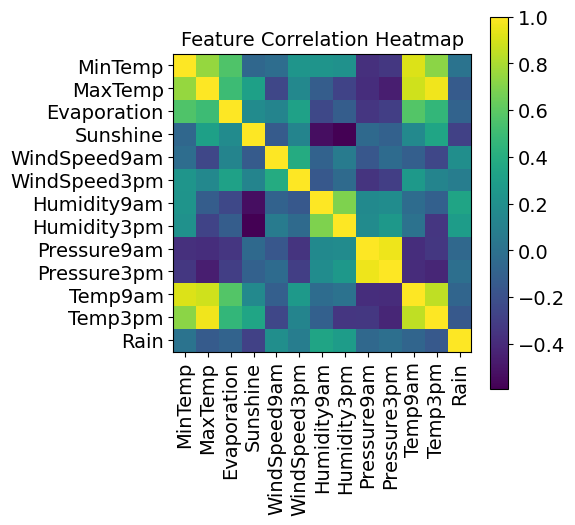

In [17]:
# Change rainfall value to 0 if it was not raining or 1 if it was raining
# df.loc[:, "Rain"] = df.loc[:, "Rainfall"].apply(lambda x: 0 if x == 0 else 1)
df.loc[:, "Rain"] = df.loc[:, "Rainfall"]
df =df.drop(columns=["Rainfall"])

# Look at correlation bewteen variables
def show_heatmap(data):
    data = df.drop(columns=["Date"])
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)

In [18]:
# Remove colums with low correlation
df = df.drop(columns=["WindSpeed3pm", "WindSpeed9am"])

# Reset index
df = df.reset_index(drop=True)
df

,Date,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rain
0,2009-01-01 00:00:00,17.7,35.1,9.8,12.9,63.0,13.0,1005.3,1000.2,22.9,34.0,0.0
1,2009-01-02 00:00:00,18.5,23.0,11.0,5.9,63.0,58.0,1012.9,1014.1,20.6,20.1,0.0
2,2009-01-03 00:00:00,16.9,23.2,9.0,0.5,52.0,50.0,1021.8,1019.4,18.9,22.0,0.0
3,2009-01-04 00:00:00,18.7,27.1,5.4,11.3,60.0,51.0,1018.5,1014.9,22.9,25.9,0.0
4,2009-01-05 00:00:00,20.2,31.6,10.0,12.2,58.0,52.0,1013.2,1008.0,24.9,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3004,2017-06-21 00:00:00,8.6,18.6,2.0,7.8,69.0,67.0,1025.7,1025.3,13.3,17.7,0.2
3005,2017-06-22 00:00:00,9.5,17.8,2.0,9.2,74.0,70.0,1028.3,1024.6,14.3,16.8,0.2
3006,2017-06-23 00:00:00,8.7,19.4,2.4,2.7,83.0,57.0,1020.8,1014.7,10.9,18.2,0.0
3007,2017-06-24 00:00:00,9.4,19.9,1.4,9.3,61.0,41.0,1017.3,1015.2,12.9,19.3,0.0


In [23]:
# Save the cleaned data
df.to_csv(OUTPUT_FILE_PATH, index=False)